# Plotting univariate data in ggplot

Updating notebook 1 to also include `borough`.

### Python and R Setup

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart



In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Import packages in R

In [4]:
%%R

require('tidyverse')


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


### Read data

In [6]:
%%R

# Read data
df <- read_csv('housing_data.csv')
df

Rows: 189 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): borough
dbl (11): zip, population, pct_hispanic_or_latino, pct_asian, pct_american_i...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 189 × 12
     zip population borough  pct_hispanic_or_latino pct_asian
   <dbl>      <dbl> <chr>                     <dbl>     <dbl>
 1 11368     112088 QUEENS                    76.5      11.6 
 2 11385     107796 QUEENS                    45.0       6.46
 3 11211     103123 BROOKLYN                  24.1       5.53
 4 11208     101313 BROOKLYN                  40.6       6.01
 5 10467     101255 BRONX                     52.1       5.68
 6 11236     100844 BROOKLYN                   7.66      2.58
 7 11226      99558 BROOKLYN                  16.4       3.07
 8 11373      94437 QUEENS                    41.7

### Histogram

👉 Try It

Grab your histogram code from the previous exercise (or just use the sample below) 

- modify the code to plot one histogram per borough 
- add a meaningful title and subtitle and axis labels

_(hint: this may require you to look up how `facet_wrap` works)._

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


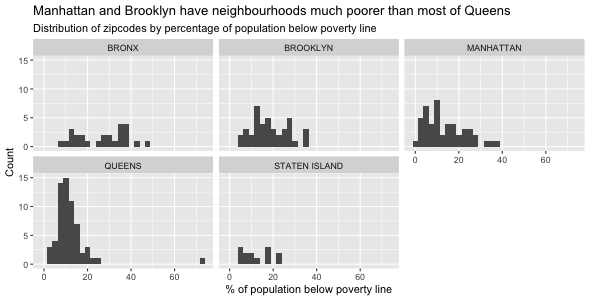

In [7]:
%%R -w 590 -h 300

ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_histogram() +
    labs(title = "Manhattan and Brooklyn have neighbourhoods much poorer than most of Queens", subtitle="Distribution of zipcodes by percentage of population below poverty line", x="% of population below poverty line", y="Count")+
    facet_wrap(vars(borough))

### Dotplot

👉 Try It

Grab your dotplot code from the previous exercise (or just use the sample below) 

- modify the code to plot one plot per borough 
- add a meaningful title and subtitle and axis labels

_(hint: you might want to change the `y` aesthetic instead of using `facet_wrap`)._

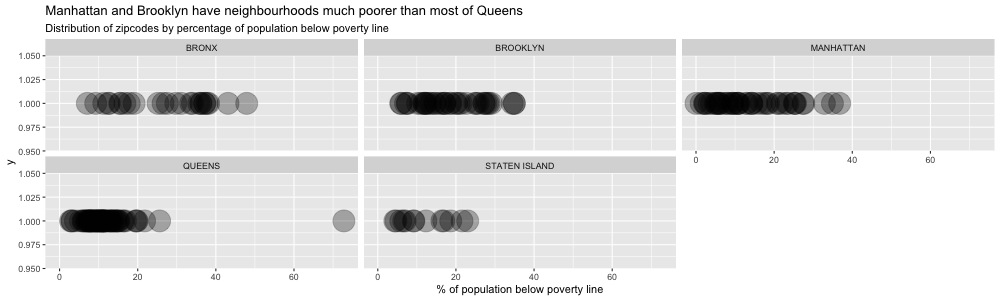

In [8]:
%%R -w 1000 -h 300
ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_point(alpha=.3, size=10) +
     labs(title = "Manhattan and Brooklyn have neighbourhoods much poorer than most of Queens", subtitle="Distribution of zipcodes by percentage of population below poverty line", x="% of population below poverty line")+
    facet_wrap(vars(borough))
    

### Dotplot (with jitter)

👉 Try It

Grab your dotplot code from the previous exercise (or just use the sample below) 

- modify the code to plot one plot per borough 
- add a meaningful title and subtitle and axis labels

_(hint: you might also need to mess with the y axis, but also the colors of the dots)._

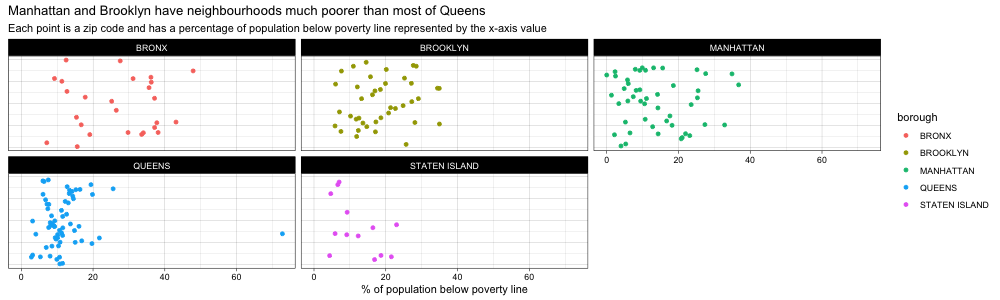

In [9]:
%%R -w 1000 -h 300
ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_jitter(aes(colour = borough)) +
     labs(title = "Manhattan and Brooklyn have neighbourhoods much poorer than most of Queens", subtitle="Each point is a zip code and has a percentage of population below poverty line represented by the x-axis value", x="% of population below poverty line", y="Count")+
    theme_linedraw() +
    theme(axis.line.y = element_blank(),
          axis.ticks.y = element_blank(),
          axis.text.y = element_blank(),
          axis.title.y = element_blank()) +
    facet_wrap(vars(borough))
    

### Density Plot

👉 Try It

Grab your density plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough


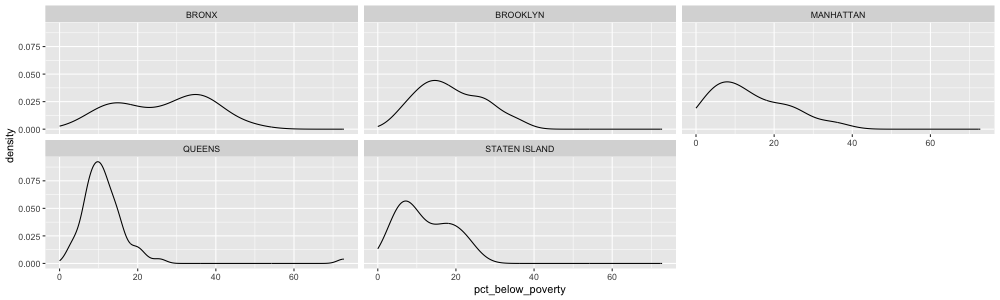

In [10]:
%%R -w 1000 -h 300
ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_density() +
    facet_wrap(vars(borough))

### Box and Whisker Plot
http://www.sthda.com/english/wiki/ggplot2-box-plot-quick-start-guide-r-software-and-data-visualization



👉 Try It

Grab your box and whisker plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough
- add a title and subtitle that helps tell a story with this chart

👉 Bonus
- see if you can annotate the biggest oulier


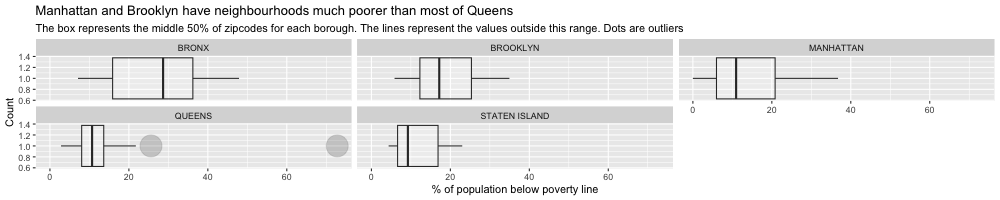

In [11]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_boxplot(alpha=.2,outlier.size=10)+
    labs(title = "Manhattan and Brooklyn have neighbourhoods much poorer than most of Queens", subtitle="The box represents the middle 50% of zipcodes for each borough. The lines represent the values outside this range. Dots are outliers", x="% of population below poverty line", y="Count")+
    facet_wrap(vars(borough)) 

### Violin Plot

👉 Try It

Grab your violin plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough
- write about how this chart looks different from the box and whisker plot and for what purpose it may be more useful
> write your answer here



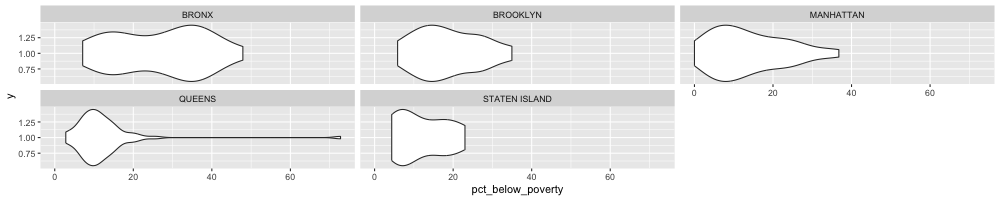

In [12]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_violin() +
    facet_wrap(vars(borough)) 

The violin plot does the a great job of showing the shape of the distribution and making the point in the title that it has a much more spread out distribution (to the right) compares to Queens.

### Beeswarm 
👉 Bonus

Grab your beeswarm code from the previous exercise

- modify the code to plot one plot per borough
- add a title and subtitle that helps tell a story with this chart

In [13]:
%%R
library(ggbeeswarm)

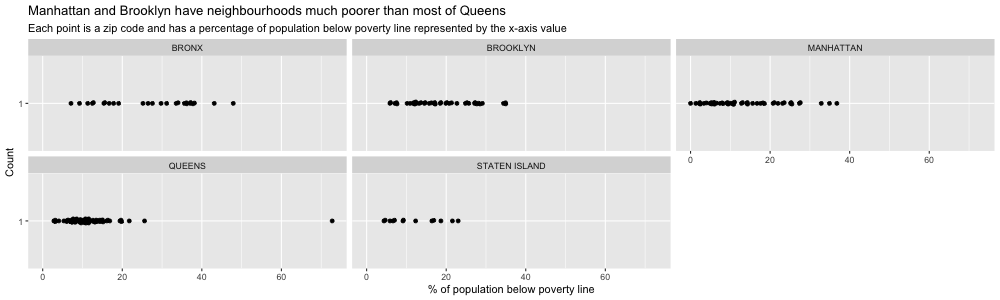

In [14]:
%%R -w 1000 -h 300

ggplot(df, aes(x = pct_below_poverty, y = factor(1))) +
    geom_beeswarm()+
    labs(title = "Manhattan and Brooklyn have neighbourhoods much poorer than most of Queens", subtitle="Each point is a zip code and has a percentage of population below poverty line represented by the x-axis value", x="% of population below poverty line", y="Count")+
    facet_wrap(vars(borough)) 